# [LAB-06] 5. 데이터 분포 시각화 (3) - Heatmap

- 추가: pandas 라이브러리에서 pivot_table import 해야됨
- 데이터 시각화 코드 짤 때
  - width_px = height_px 같은 값으로 지정하는게 국룰
  (∵ 시각화 성격의 특성)
  - 추가되는 파라미터 종류: 기능
      - fmt: 셀 안 수치값의 형식 보기 편하게 바꿔줌
        - ex) 표현: 1.5e^2 (=1.5 x 10^2) -> 150  
      - cmap(color map): 색상 유형을 바꿔줌
        - 종류: 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges, 'Reds', 'YlGnBu'..
      - linewidth: 각 셀 사이의 선 굵기
    - drawback: 셀 이름 정렬이 알파벳순임
      - -> dictionary로 renaming 필요함 
        - how? 해당 뜻의 순서(by숫자) or 한글로
        - by: using 맵함수
          - : .map(월 이름과 숫자를 매칭한 딕셔너리)

- 계절성 뜻: 주기성의 파동형 그래프 형태

## #01. 준비작업

### 1. 패키지 참조

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table

### 2. 그래프 초기화

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 16          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기

In [3]:
origin = load_data('flights')
origin.head()

[data] https://data.hossam.kr/data/lab06/flights.xlsx
[desc] 어느 항공사의 년/월별 국제선 탑승객 수(출처: seaborn 내장 데이터)

field       description
----------  ----------------------------------
year        항공 승객 수가 집계된 연도
month       항공 승객 수가 집계된 월
passengers  해당 년도/월의 국제선 항공 승객 수



,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### 4. 데이터 전처리 - .pivot_table()
- .pivot_table() 함수 쓰기 전에 전처리 해야됨
  - why?: 셀 이름 정렬을 알파벳순으로 피봇테이블 만듦
    - -> dictionary로 renaming 필요함 
      - how? 해당 뜻의 순서(by숫자) or 한글로
      - by: using 맵함수
        - : .map(월 이름과 숫자를 매칭한 '딕셔너리')

In [4]:
df = origin.copy()
df['month'] = df['month'].map(
    {
        "January": 1,
        "February": 2,
        "March": 3,
        "April": 4,
        "May": 5,
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12
    }
)
df.head()

,year,month,passengers
0,1949,1,112
1,1949,2,118
2,1949,3,132
3,1949,4,129
4,1949,5,121


In [5]:
df2 = pivot_table(df, index = 'year',
                  columns = 'month', values = 'passengers')
df2

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1949,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0
1950,115.0,126.0,141.0,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0
1951,145.0,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0
1952,171.0,180.0,193.0,181.0,183.0,218.0,230.0,242.0,209.0,191.0,172.0,194.0
1953,196.0,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0,211.0,180.0,201.0
1954,204.0,188.0,235.0,227.0,234.0,264.0,302.0,293.0,259.0,229.0,203.0,229.0
1955,242.0,233.0,267.0,269.0,270.0,315.0,364.0,347.0,312.0,274.0,237.0,278.0
1956,284.0,277.0,317.0,313.0,318.0,374.0,413.0,405.0,355.0,306.0,271.0,306.0
1957,315.0,301.0,356.0,348.0,355.0,422.0,465.0,467.0,404.0,347.0,305.0,336.0


## #02. Heatmap 시각화

- 데이터의 패턴 (특히 밀도, 분포)를 빠르게 파악할 수 있게 해주는 시각화 tool임
- 행과 열을 가진 행렬 형테의 데이테에 색상을 입히고
- 각 셀의 수치에 따라 색상이 진해짐
- 추가 파라미터
  - annot=True: 수치값을 함께 표시함
  - fmt: annot=True가 설정된 경우 표시되는 수치값의 형식 지정
  - linewidth: 각 셀 사이의 선 굵기
  - camp: 칼라맵 
    - 종류: 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds' / 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu' / 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn' / 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu' / 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic' / 'berlin', 'managua', 'vanimo'


### 1. 기본 사용 방법

실습:성적표 데이터에 대한 점수 분포 시각화

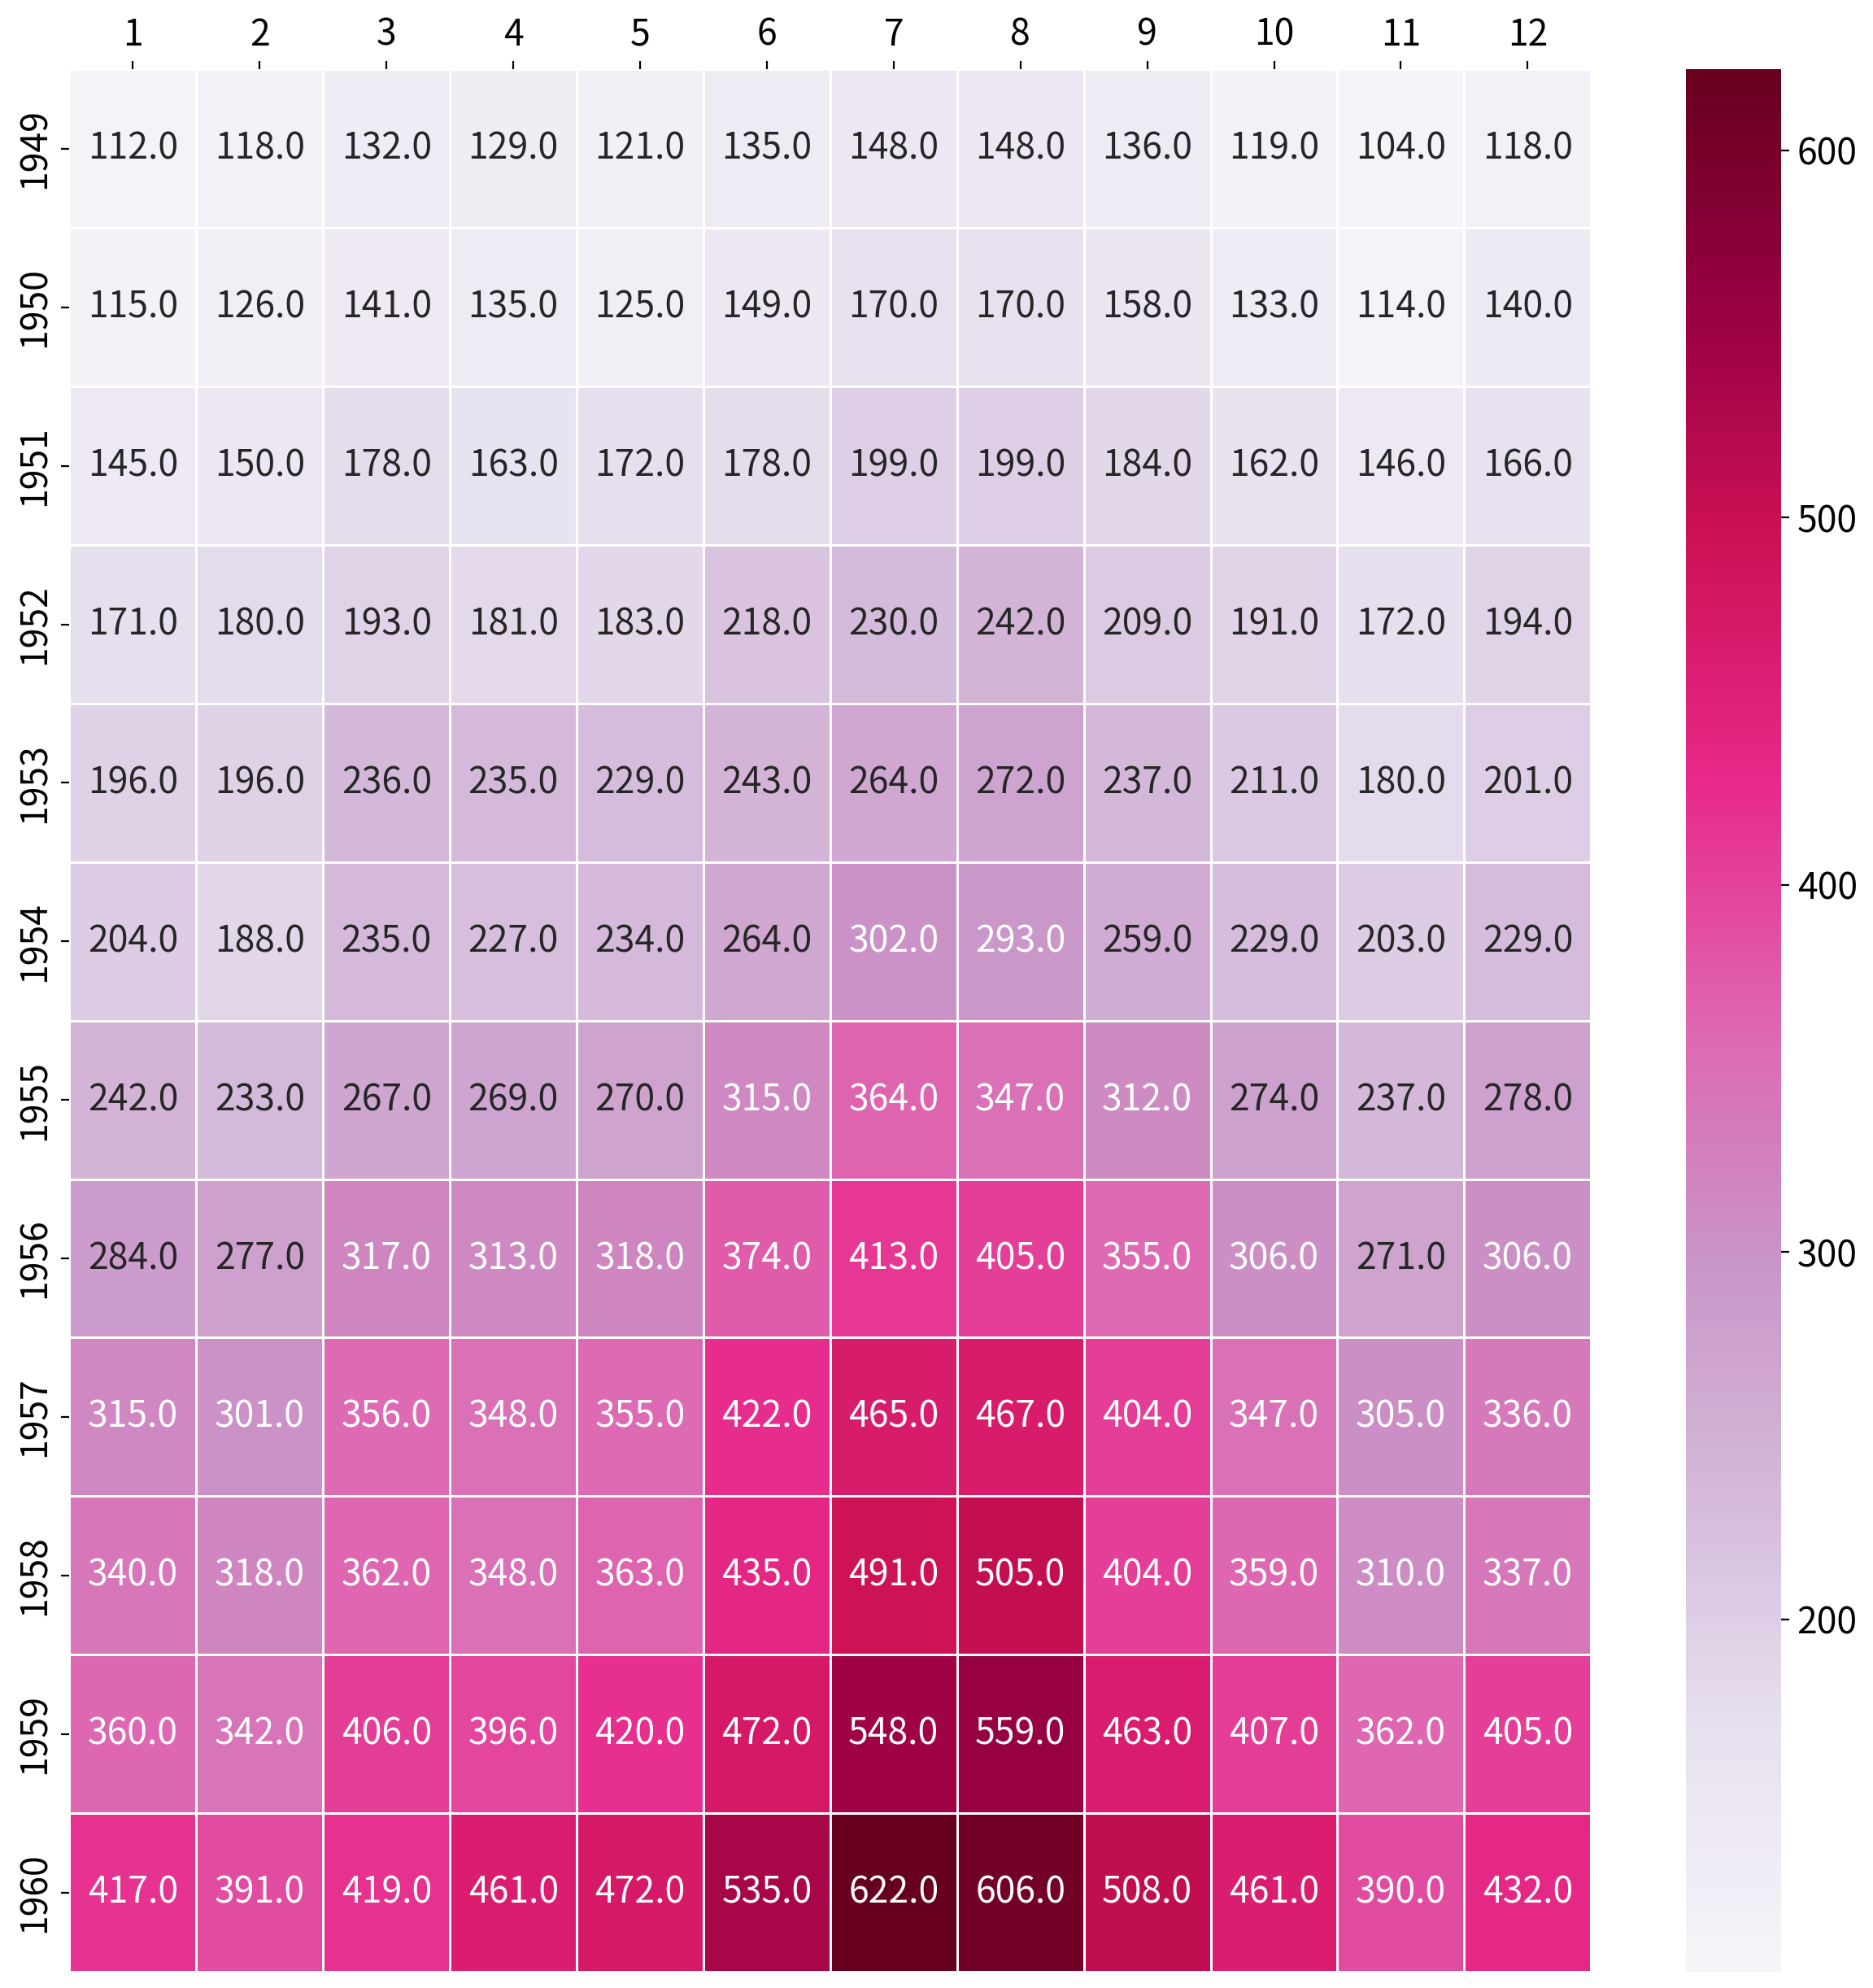

In [6]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 2500             # 그래프 가로 크기
height_px = 2500             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Histogram 그리기: seaborn 사용
sb.heatmap(data = df2, annot=True, fmt='0.1f', 
           linewidth = 0.5, cmap = "PuRd")

# 3) 그래프 꾸미기: 
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()     # x축 변수 이름을 상단으로 이동 

# 4) 출력
plt.savefig('plot.png', dpi = my_dpi * 2)   # 이미지파일 저장                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

- 해석 (그래프 읽는 방법):
  - 여름 (6~8월)에 색 진함 -> 매 해 해당 월 승객 수 多
  - 년도가 증가할 수록 색 농도 짙어짐 -> 추세: 항공 수요 증가
  - 년도별 패턴은 동일 but 수치가 증가 -> 데이터 구조: 계절성 + 추세 혼합의 전형적인 시계열 패턴
    - (계절성: 파동형 주기성)